In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

import os
import cv2
import random
import math


Bad key "text.kerning_factor" on line 4 in
c:\umdprojects\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Load Images

In [2]:
cat_imgs = []
dog_imgs = []

labels = []

cat_directory = 'output/cat_dog/train/cat/'
dog_directory = 'output/cat_dog/train/dog/'

for filename in os.listdir(cat_directory):
    if filename.endswith(".jpg"):
        f = cv2.imread(os.path.join(cat_directory, filename))
        labels.append('cat')
        cat_imgs.append(f)
    
for filename in os.listdir(dog_directory):
    if filename.endswith(".jpg"):
        f = cv2.imread(os.path.join(dog_directory, filename))
        labels.append('dog')
        dog_imgs.append(f)


In [3]:
random.shuffle(cat_imgs)
random.shuffle(dog_imgs)

In [4]:
data_size = len(cat_imgs) + len(dog_imgs)
train_size = math.floor(0.75*data_size)
test_size = data_size - train_size


train_list = cat_imgs[:math.floor(train_size/2)] + dog_imgs[:math.ceil(train_size/2)]
label_list = (['cat']* math.floor(train_size/2)) + (['dog']* math.ceil(train_size/2))

test_list = cat_imgs[math.floor(train_size/2):] + dog_imgs[math.ceil(train_size/2):]
test_label_list = (['cat']* math.floor(test_size/2)) + (['dog']* math.ceil(test_size/2))

In [5]:
len(test_list)

53

### Train

#### Reshape

In [6]:
np_train = np.asarray(train_list)
np_train_label = np.asarray(label_list)

np_test = np.asarray(test_list)
np_test_label = np.asarray(test_label_list)

In [7]:
np_train.shape

(157, 50, 50, 3)

In [8]:
train = np_train.reshape(np.prod(np_train.shape[:1]),-1)
test = np_test.reshape(np.prod(np_test.shape[:1]),-1)

In [9]:
train.shape

(157, 7500)

In [10]:
test.shape

(53, 7500)

In [11]:
np_train_label

array(['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat',
       'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
       'dog', 'dog',

In [12]:
np.count_nonzero(np_train_label == 'dog')


79

In [13]:
np.count_nonzero(np_train_label == 'cat')


78

In [47]:
clf = svm.SVC(gamma=0.0001, C=0.01, verbose = True, kernel='linear')
clf.fit(train, np_train_label)

[LibSVM]

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

Confusion matrix, without normalization
[[25  0]
 [ 0 28]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


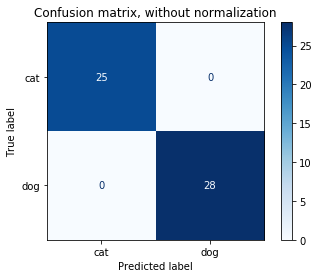

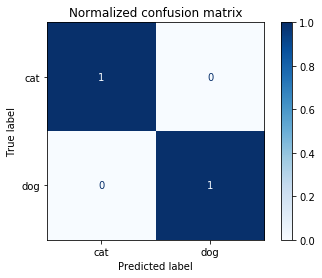

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test, y_pred,
                                 display_labels=['cat','dog'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()